<a href="https://colab.research.google.com/github/j-j-ro/JRoDigital/blob/main/DataCleaning%26VisualizationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cleaning and visualizing the World Happiness Report**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('world_happiness_report.csv')


#data cleaning portion

#to check for duplicate values
duplicates = df.duplicated().sum()
print('Duplicates:', duplicates) #no duplicates found

#to check if there are any missing values
missing_values = df.isnull().sum()
print('Missing Values:', missing_values) #no missing values, the negative value refers
                                          # to the index of 0

#to check for any negative values, first filter out only numeric columns:
#all numeric columns (floats and integers)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
  if (df[col] < 0).any(): #looks for any value less than 0
    print(f'Column {col} contains negative values.')

    # there are values that are negative, which is in generosity, i believe this was the intention though,
    # I will be removing the column along with others that are not important to my analysis)

df.drop(columns=['Generosity','Unemployment_Rate','Unemployment_Rate', 'Education_Index',
                 'Urbanization_Rate', 'Life_Satisfaction', 'Public_Trust', 'Mental_Health_Index',
                 'Income_Inequality', 'Public_Health_Expenditure', 'Climate_Index', 'Work_Life_Balance',
                 'Internet_Access', 'Crime_Rate', 'Political_Stability', 'Employment_Rate'], inplace=True)



Duplicates: 0
Missing Values: Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64
Column Generosity contains negative values.


In [ ]:
#print the data
print(df)

           Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
0            China  2022             4.39        44984.68            0.53   
1               UK  2015             5.49        30814.59            0.93   
2           Brazil  2009             4.65        39214.84            0.03   
3           France  2019             5.20        30655.75            0.77   
4            China  2022             7.28        30016.87            0.05   
...            ...   ...              ...             ...             ...   
3995  South Africa  2005             7.43         1504.73            0.17   
3996         India  2018             5.71        50182.85            0.96   
3997  South Africa  2021             6.23         6158.53            0.22   
3998        Brazil  2014             5.73        38214.54            0.46   
3999            UK  2016             3.26        30740.42            0.11   

      Healthy_Life_Expectancy  Freedom  Corruption_Perception  Population  

In [ ]:
## Since the dataset contains a large number of rows, I further refined the data. Many rows had duplicate country and year entries with
# varying values. To address this, I averaged all numeric columns and organized the data so that each country has a single entry per year.

df_cleaned = df.groupby(['Country', 'Year']).mean(numeric_only=True).reset_index()
print(df_cleaned)

       Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
0    Australia  2005         5.430667    28886.978000        0.528667   
1    Australia  2006         6.030556    28936.431111        0.677222   
2    Australia  2007         5.600000    36317.625455        0.505000   
3    Australia  2008         5.868889    27944.319444        0.467778   
4    Australia  2009         5.182857    29764.803810        0.524762   
..         ...   ...              ...             ...             ...   
195        USA  2020         5.271667    28603.595417        0.494167   
196        USA  2021         6.193478    27768.738261        0.629565   
197        USA  2022         5.830370    32318.473704        0.459630   
198        USA  2023         5.465714    34045.116667        0.534286   
199        USA  2024         5.072857    34432.532857        0.480952   

     Healthy_Life_Expectancy   Freedom  Corruption_Perception    Population  
0                  68.128667  0.372000       

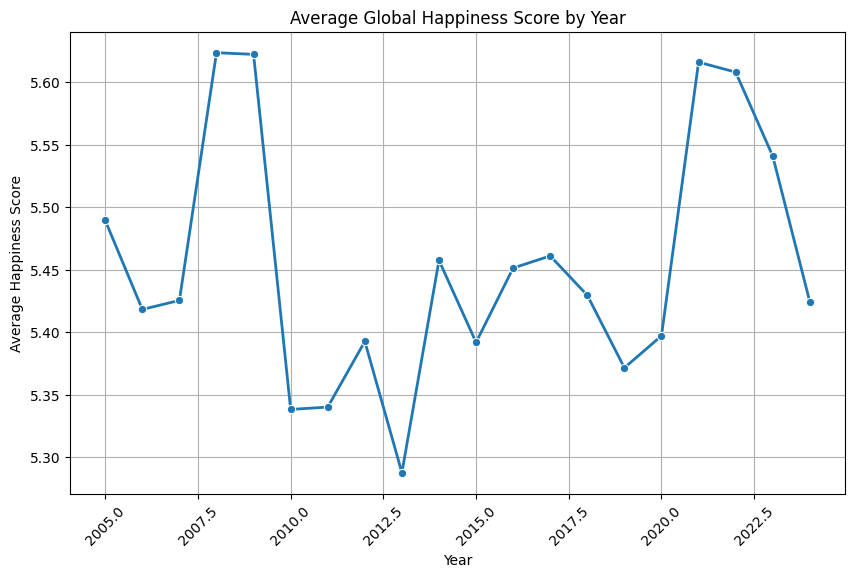

In [ ]:
#shows the average global happiness score per year using a line chart
df_year = df.groupby('Year')['Happiness_Score'].mean().reset_index() #groups df by year & averages the happiness score of each country

#create the chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_year['Year'], y=df_year['Happiness_Score'], marker = 'o', linewidth=2)
plt.title('Average Global Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45) #rotates ticks
plt.grid(True) #adds gridlines
plt.show()

<ipython-input-11-5d7d4f8f62c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness_Score', y='Country', data=top_3, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

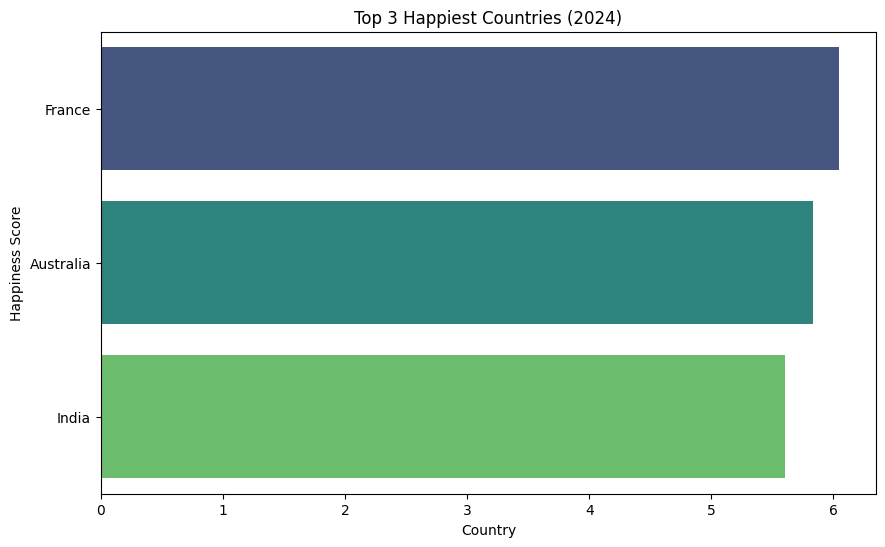

In [ ]:
#top 3 happiest countries visualized using a horizontal bar chart (2024)
df_2024 = df_cleaned[df_cleaned['Year'] == 2024] #filter for data in 2024

#create a df with top 3 countries
top_3 = df_2024.nlargest(3,'Happiness_Score')

#create the chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness_Score', y='Country', data=top_3, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 3 Happiest Countries (2024)')
plt.show

<ipython-input-12-865cddcada49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness_Score', y='Country', data=bottom_3, palette='coolwarm')


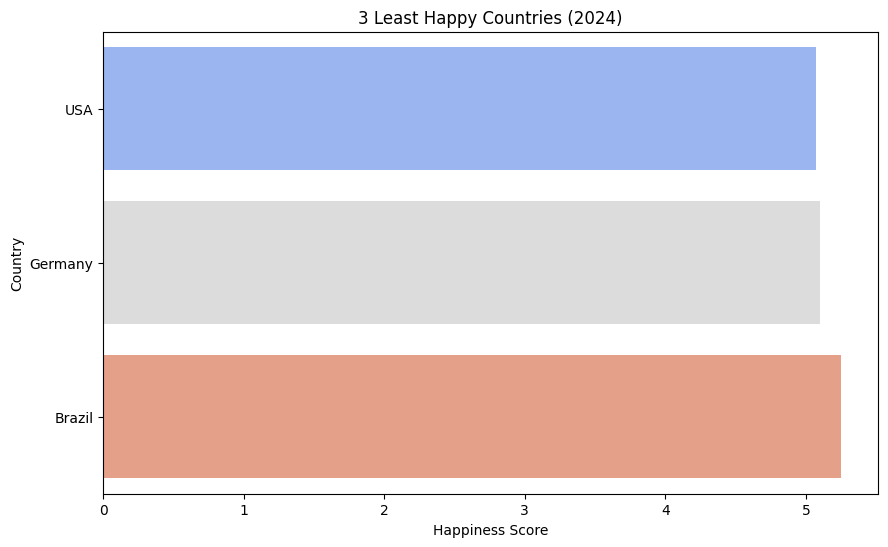

In [ ]:
#3 not-so happy countries using a horizontal bar chart (2024)
bottom_3 = df_2024.nsmallest(3,'Happiness_Score')

#assigns x & y values with the data
plt.figure(figsize=(10,6))
sns.barplot(x='Happiness_Score', y='Country', data=bottom_3, palette='coolwarm')

#set titles and labels
plt.title('3 Least Happy Countries (2024)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


In [ ]:
# Shows the happiness score over the years per country in data set
#plt.figure(figsize=(15,8))
#sns.lineplot(x='Year', y='Happiness_Score', hue='Country', data=df_cleaned)
#plt.xlabel('Year')
#plt.ylabel('Happiness Score')
#plt.title('Happiness Score Over the Years by Country')
#plt.legend(title='Country')
#plt.grid(True)
#plt.show()


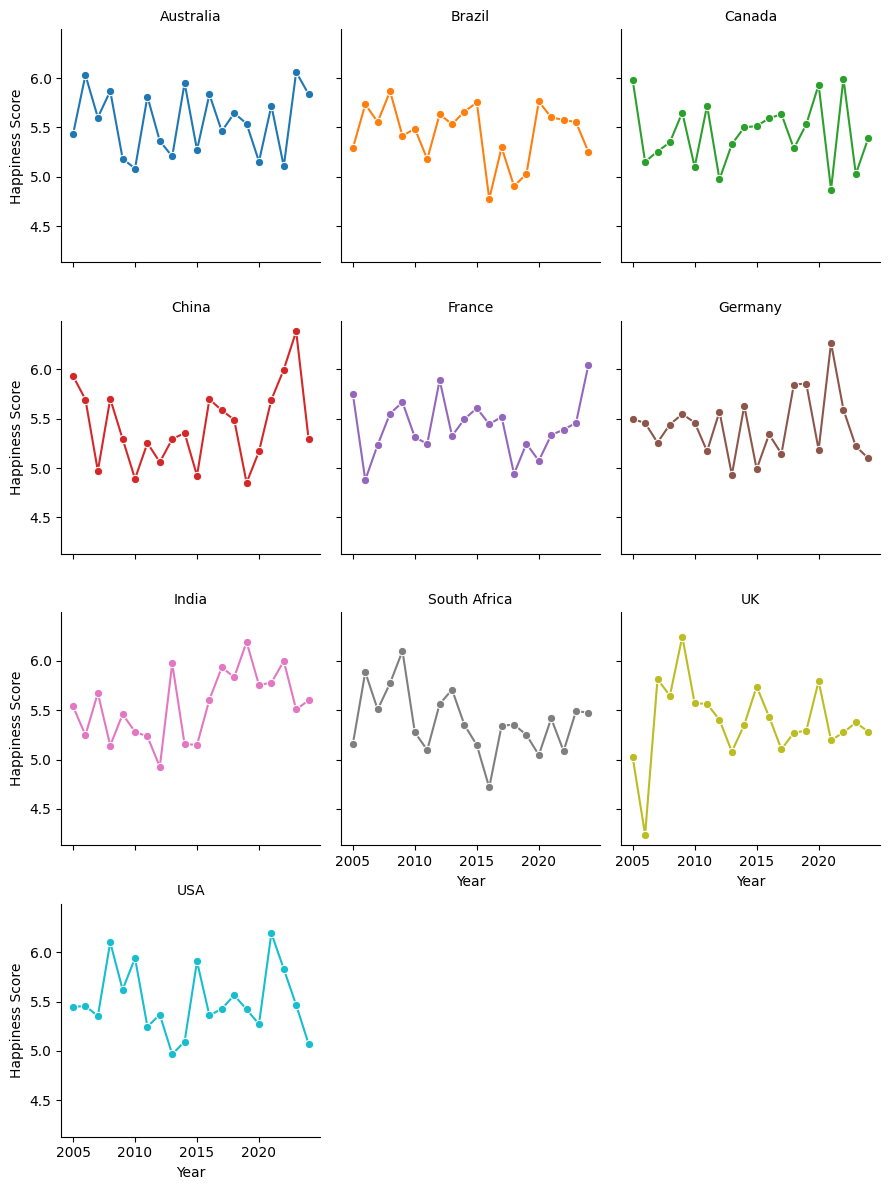

In [ ]:
# shows the happiness score over time using FacetGrid to map each country their own line chart
g = sns.FacetGrid(df_cleaned, col='Country', hue='Country', col_wrap=3, height=3, sharey=True, sharex=True)
  #inputs df_cleaned into FacetGrid, each column has data from 'Country' in the df, each country is assigned
  #with a color,
g.map(sns.lineplot, 'Year', 'Happiness_Score', marker='o') #uses a lineplot and each plot is an 'o'

g.set_titles('{col_name}') #creates a tile for each chart
g.set_axis_labels('Year', 'Happiness Score') #sets axis labels


plt.tight_layout() #proportions the plts
plt.show()

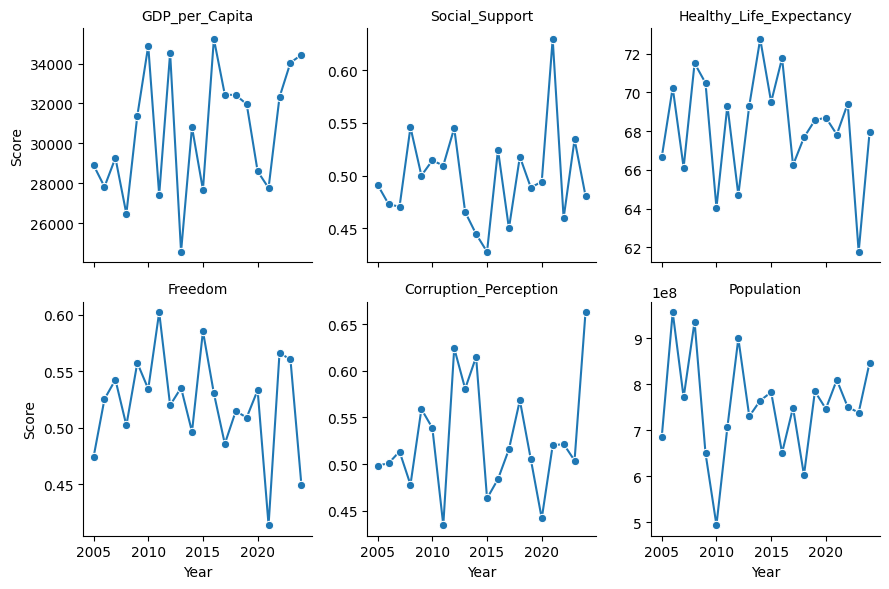

In [ ]:
df_us = df_cleaned[df_cleaned['Country'] == 'USA']

contributing_factors = ['GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Corruption_Perception', 'Population']

# Melt the DataFrame to make each contributing factor its own column
df_us_melted = df_us.melt(id_vars=['Year', 'Country'], value_vars=contributing_factors, var_name='variable', value_name='Score')

# Create a FacetGrid to map each contributing factor to its own plot
g = sns.FacetGrid(df_us_melted, col='variable', col_wrap=3, height=3, sharey=False, sharex=True)

# Map the lineplot for each contributing factor
g.map(sns.lineplot, 'Year', 'Score', marker='o')

columns = ['GDP Per Capita', "Social Support", "Healthy Life Expectancy", "Freedom", "Corruption", "Perception", "Population"]

for col in {}
# Set titles and axis labels
g.set_titles("{col_name}")
g.set_axis_labels('Year', 'Score')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In [ ]:
print(df_us)

    Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
180     USA  2005         5.447200    28915.454400        0.491200   
181     USA  2006         5.455417    27827.833750        0.472917   
182     USA  2007         5.353913    29275.784348        0.470435   
183     USA  2008         6.101053    26474.952632        0.545789   
184     USA  2009         5.621500    31379.767000        0.500000   
185     USA  2010         5.941250    34887.223750        0.514375   
186     USA  2011         5.246818    27425.191364        0.509545   
187     USA  2012         5.367143    34524.055714        0.545000   
188     USA  2013         4.966667    24573.465833        0.465417   
189     USA  2014         5.095000    30811.861500        0.444500   
190     USA  2015         5.907273    27681.247727        0.427727   
191     USA  2016         5.360000    35229.349444        0.524444   
192     USA  2017         5.426667    32443.557500        0.450000   
193     USA  2018   

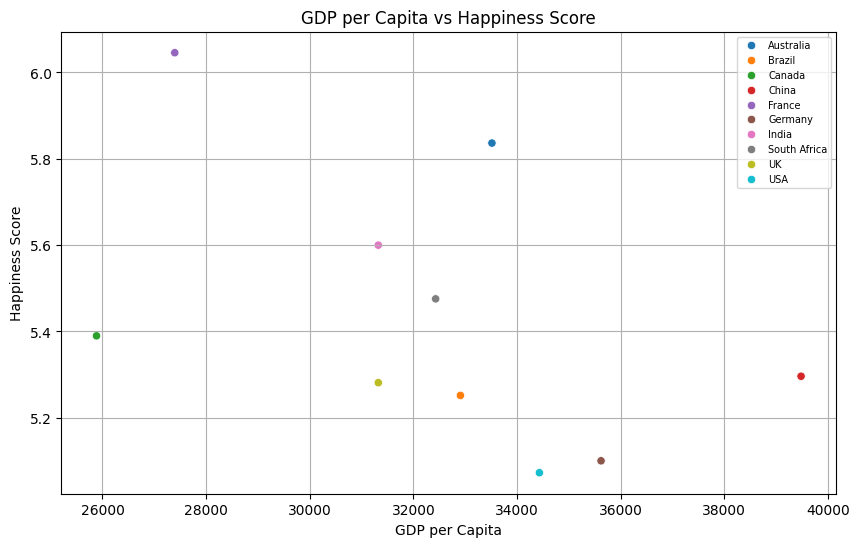

In [ ]:
## scatter plot of gdp per capita and happiness score
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GDP_per_Capita", y="Happiness_Score", hue="Country", data=df_2024) #assigns x & y, gives each country their own color
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs Happiness Score')
plt.legend(prop={'size': 7}) #sets the size for the legend
plt.grid(True)
plt.show()